In [97]:
# load modules
import os
import sys
import gzip
import numpy as np
import scipy.stats as stats
import pandas as pd
import pickle
import anndata
import scanpy as sc
import scipy
import seaborn as sns
import pdb

import collections
from scipy.io import mmread,mminfo
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [98]:
#cell_dic
markers_df = pd.read_csv('/Users/xueerchen/Downloads/bc_signatures - version_1216.csv')#pd.read_csv('/Users/xueerchen/Downloads/bc_signatures - Overall_sorted_1121.csv')#pd.read_csv('signature_v1_res/BC_cellsignatures_final.csv')#pd.read_csv('signature_v1_res/BC_cellsignatures_mod.csv')#pd.read_csv('/Users/xueerchen/Documents/spatial/bc/Tcellsignatures_june2020.csv')##('mouse_brain_marker_gene-SH.csv')
cells = markers_df.columns.values
marker_genes = []
#cell_dic = {}
cell_dic_plot = {}
for c in cells:
    cc = np.array(markers_df[c].values.tolist())
    marker_genes = np.append(marker_genes,[x for x in cc if str(x) != 'nan'])
    #cell_dic[c] = [x for x in cc if str(x) != 'nan']
    cell_dic_plot[c] = [x for x in cc if str(x) != 'nan']
  

In [99]:
sampleA_path = "data/MICHELLE_0212_AHJTWTDRXX__Project_10778__Sample_Patient1A_012020_IGO_10778_1/outs/"#'/home/jiwei/miao/bc_visium/MICHELLE_0212_AHJTWTDRXX__Project_10778__Sample_Patient2A_021120_IGO_10778_3/outs/' #path to directory with 'spatial' file
sampleA_count = 'filtered_feature_bc_matrix.h5'
adA = sc.read_visium(path=sampleA_path, count_file = sampleA_count, library_id='1A')
adA.var_names_make_unique()


sample_path = "data/MICHELLE_0212_AHJTWTDRXX__Project_10778__Sample_Patient1B_012020_IGO_10778_2/outs/"#"/home/jiwei/miao/bc_visium_mod/data/Reosis_AA8934_TS-Reosis_1_A1_IGO_11934_1/"#'/home/jiwei/miao/bc_visium/MICHELLE_0212_AHJTWTDRXX__Project_10778__Sample_Patient2A_021120_IGO_10778_3/outs/' #path to directory with 'spatial' file
sample_count = 'filtered_feature_bc_matrix.h5'
adB = sc.read_visium(path=sample_path, count_file = sample_count, library_id='1B')#sc.read_visium(path=sample1_path, count_file = sample1_count, library_id='Reosis_AA8934_TS-Reosis_1_A1_IGO_11934_1')
adB.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... storing 'feature_types' as categorical
... storing 'genome' as categorical


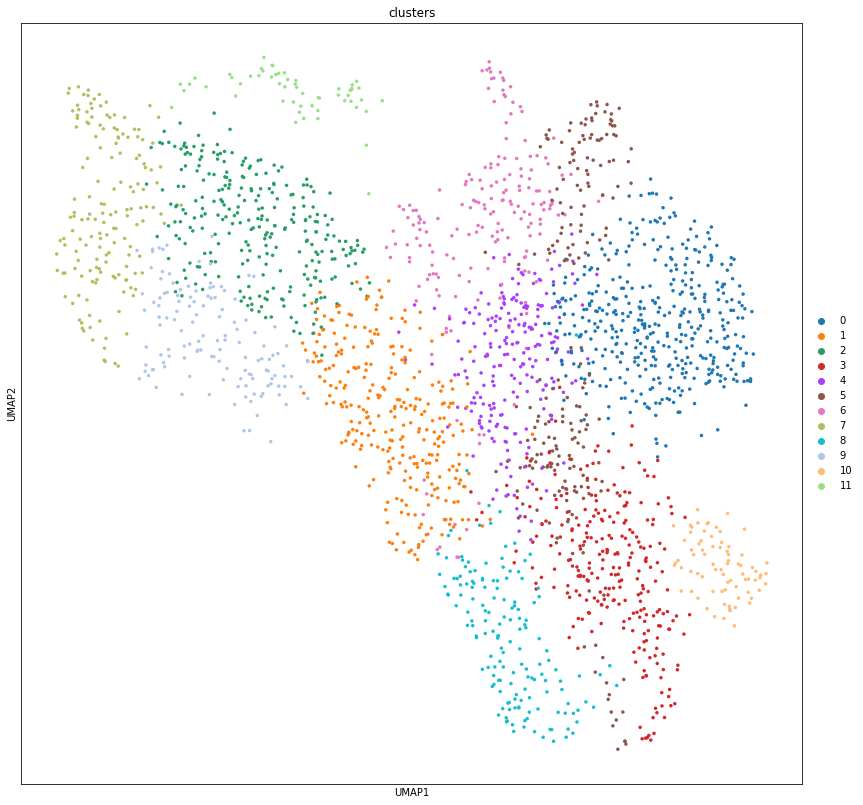

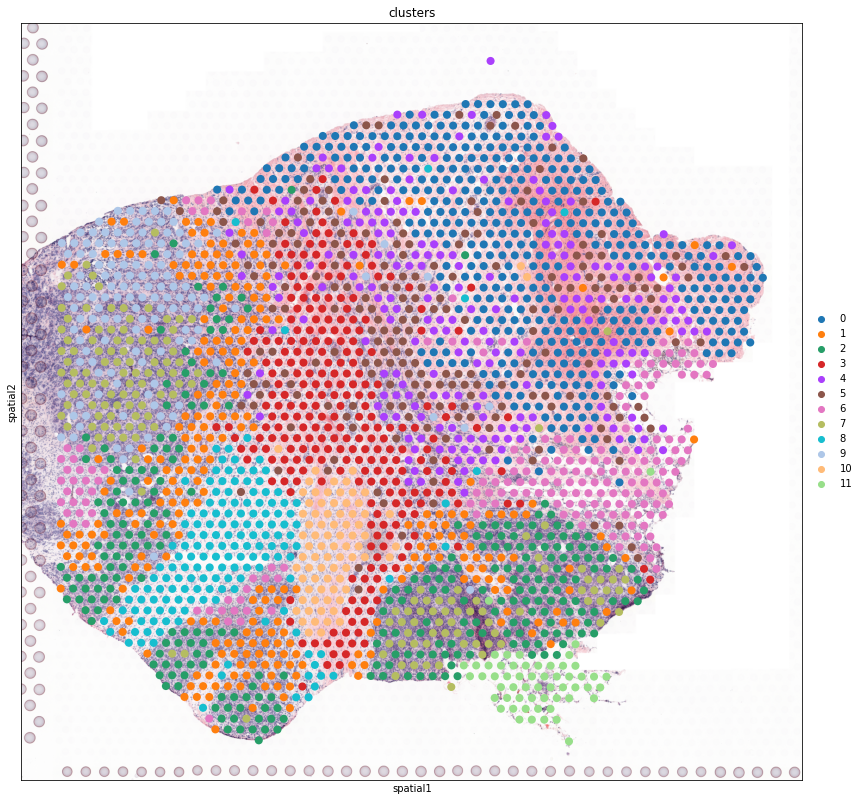

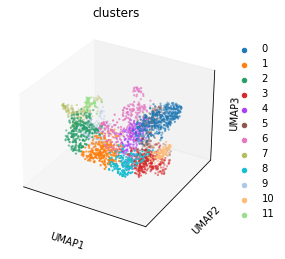

In [100]:
sc.pp.normalize_total(adA, inplace=True)
sc.pp.log1p(adA)
sc.pp.highly_variable_genes(adA, flavor="seurat", n_top_genes=5000, inplace=True)

sc.pp.pca(adA)
sc.pp.neighbors(adA)
sc.tl.umap(adA)
sc.tl.leiden(adA, key_added="clusters")


sc.pl.umap(adA, color=["clusters"], wspace=0.4)

sc.pl.spatial(
        adA,
        img_key="hires",
        
        color="clusters"
    )

sc.tl.umap(adA,n_components=3)
sc.tl.leiden(adA, key_added="clusters")
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adA, color=["clusters"], wspace=0.4,projection='3d')



... storing 'feature_types' as categorical
... storing 'genome' as categorical


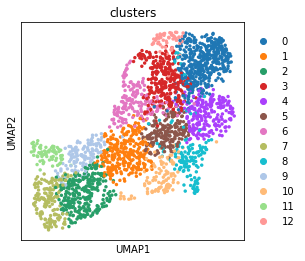

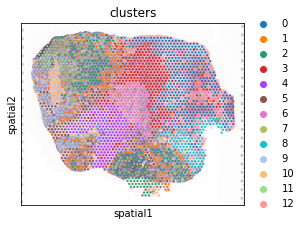

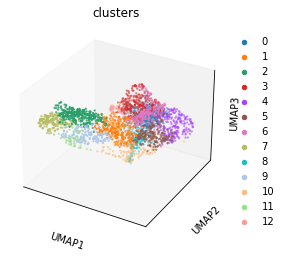

In [101]:
sc.pp.normalize_total(adB, inplace=True)
sc.pp.log1p(adB)
sc.pp.highly_variable_genes(adB, flavor="seurat", n_top_genes=5000, inplace=True)

sc.pp.pca(adB)
sc.pp.neighbors(adB)
sc.tl.umap(adB)
sc.tl.leiden(adB, key_added="clusters")


sc.pl.umap(adB, color=["clusters"], wspace=0.4)

sc.pl.spatial(
        adB,
        img_key="hires",
        
        color="clusters"
    )

sc.tl.umap(adB,n_components=3)
sc.tl.leiden(adB, key_added="clusters")
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adB, color=["clusters"], wspace=0.4,projection='3d')




In [102]:
exp_df_B = pd.DataFrame.sparse.from_spmatrix(adB.X)
exp_df_B.index = adB.obs.index
exp_df_B.columns = adB.var.index
#exp_df_B.head()

RPS_genes = [i for i in exp_df_B.columns.values if i.startswith('RPS')]
print(len(RPS_genes))
RPL_genes = [i for i in exp_df_B.columns.values if i.startswith('RPL')]
print(len(RPL_genes))
MT_genes = [i for i in exp_df_B.columns.values if i.startswith('MT-')]
print(len(MT_genes))

print(exp_df_B.shape)
exp_df_B.drop(RPS_genes, axis=1,inplace=True)#df.drop(['B', 'C'], axis=1)
print(exp_df_B.shape)
exp_df_B.drop(RPL_genes, axis=1,inplace=True)
print(exp_df_B.shape)
exp_df_B.drop(MT_genes, axis=1,inplace=True)
print(exp_df_B.shape)



48
56
13
(2551, 33538)
(2551, 33490)
(2551, 33434)
(2551, 33421)


In [103]:
import scipy.sparse

exp_df = pd.DataFrame.sparse.from_spmatrix(adA.X)
exp_df.index = adA.obs.index
exp_df.columns = adA.var.index
exp_df.head()

RPS_genes = [i for i in exp_df.columns.values if i.startswith('RPS')]
print(len(RPS_genes))
RPL_genes = [i for i in exp_df.columns.values if i.startswith('RPL')]
print(len(RPL_genes))
MT_genes = [i for i in exp_df.columns.values if i.startswith('MT-')]
print(len(MT_genes))

print(exp_df.shape)
exp_df.drop(RPS_genes, axis=1,inplace=True)#df.drop(['B', 'C'], axis=1)
print(exp_df.shape)
exp_df.drop(RPL_genes, axis=1,inplace=True)
print(exp_df.shape)
exp_df.drop(MT_genes, axis=1,inplace=True)
print(exp_df.shape)

48
56
13
(2454, 33538)
(2454, 33490)
(2454, 33434)
(2454, 33421)


In [104]:
# markers_gsva_1A_individual.csv
gsva_scores1 = pd.read_csv('signature_v3_res/markers_gsva_1A_individual_mod.csv',index_col=0)#pd.read_csv('signature_v2_res/markers_gsva_1A.csv',index_col=0)#pd.read_csv('signature_v1_res/markers_gsva_1A.csv',index_col=0)
gsva_scores2 = pd.read_csv('signature_v3_res/markers_gsva_1A_individual_mod.csv',index_col=0)#pd.read_csv('signature_v2_res/markers_gsva_1A.csv',index_col=0)#pd.read_csv('signature_v1_res/markers_gsva_1A.csv',index_col=0)
gsva_scores3 = pd.read_csv('signature_v3_res/markers_gsva_1A_individual_mod.csv',index_col=0)#pd.read_csv('signature_v2_res/markers_gsva_1A.csv',index_col=0)#pd.read_csv('signature_v1_res/markers_gsva_1A.csv',index_col=0) # for training BCE loss
#gsva_scores
gsva_scores1.columns = gsva_scores1.columns.str.replace(' ', '')
gsva_scores2.columns = gsva_scores2.columns.str.replace(' ', '')
gsva_scores3.columns = gsva_scores3.columns.str.replace(' ', '')

gsva_scores1 = gsva_scores1.drop(columns=['Treg','Her2E_SC2','LumA_SC2', 'LumB_SC2'])#,'Treg''Th17','CD4+_Tcell_anergy'
gsva_scores2 = gsva_scores2.drop(columns=['Treg','Her2E_SC2','LumA_SC2', 'LumB_SC2'])
gsva_scores3 = gsva_scores3.drop(columns=['Treg','Her2E_SC2','LumA_SC2', 'LumB_SC2'])

for i in gsva_scores1.columns:
    
    gsva_scores2.loc[gsva_scores1[i] >= gsva_scores1[i].quantile(0.9999), i] = 1#0.9999   
    gsva_scores2.loc[(gsva_scores1[i] > gsva_scores1[i].quantile(0.95))&(gsva_scores1[i] < gsva_scores1[i].quantile(0.9999)), i] = 2
    gsva_scores2.loc[gsva_scores1[i] < gsva_scores1[i].quantile(0.95), i] = 0


    gsva_scores3.loc[gsva_scores1[i] >= gsva_scores1[i].quantile(0.7), i] = 1#0.9999   
    
    gsva_scores3.loc[gsva_scores1[i] < gsva_scores1[i].quantile(0.7), i] = 0
    
    #gsva_scores2.loc[gsva_scores1[i] >= gsva_scores1[i].quantile(0.999), i] = 1#0.9999   
    #gsva_scores2.loc[(gsva_scores1[i] > gsva_scores1[i].quantile(0.99))&(gsva_scores1[i] < gsva_scores1[i].quantile(0.999)), i] = 2
    #gsva_scores2.loc[gsva_scores1[i] < gsva_scores1[i].quantile(0.99), i] = 0



(2454, 26)


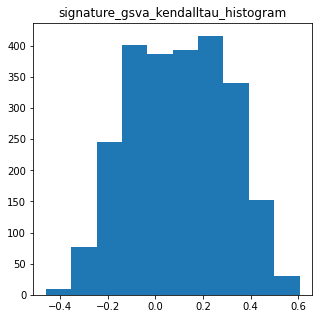

In [132]:
from scipy import stats

mean_ct_signature = []# shape:n_pseudospots X len(gsva_scores1.columns)
#tt = adA.obs
#ttt = np.array(tt['arches_nn_ct'].unique())
#x[~numpy.isnan(x)]
for i in gsva_scores1.columns:#cell_dic_plot.keys():#valid_cell_dic_ct.keys():#ttt[~np.isnan(ttt)]:#cell_dic_plot.keys():
    
    #mask = tt['arches_nn_ct']==i
    #spots = tt.loc[mask].index.values#adA.obs.loc[:,dA.obs.loc['arches_nn']].index.values()# df1.loc[:, df1.loc['a'] > 0]
    genes_sele = cell_dic_plot[i]
    mean_n = dt[dt.columns.intersection(genes_sele)].sum(axis=1)/len(dt.columns.intersection(genes_sele))
    #dt.loc[arch_nn_spots_ct][dt.columns.intersection(genes_sele)].sum(axis=1)/len(dt.columns.intersection(genes))#dt.loc[spots][dt.columns.intersection(genes_sele)].sum(axis=1)/len(dt.columns.intersection(genes))
    # dt[dt.columns.intersection(genes)].sum(axis=1)/len(dt.columns.intersection(genes))
    mean_ct_signature.append(mean_n)#np.append(mean_arch_ct,mean_n)
    
mean_ct_signature = np.array(mean_ct_signature).T
print(mean_ct_signature.shape)

tau_list = []
pv_list = []
for i in range(gsva_scores1.shape[0]):
    
    tau, p_value = stats.kendalltau(mean_ct_signature[i], gsva_scores1.iloc[i])
    tau_list.append(tau)
    pv_list.append(p_value)
    
from matplotlib import pyplot as plt 
   
plt.hist(tau_list)#, bins = [0,20,40,60,80,100]) 
plt.title("signature_gsva_kendalltau_histogram") 
plt.show()

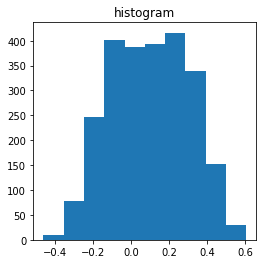

In [107]:
arches_val_ct = []

arch_spots_ct = []
#archs = []
spot_sizes_ct = []
cts_ct = []
#archs = []
for i in adA.obs.index:
    ds = gsva_scores2.loc[i+'_1A',:]
    mask = ds == 1
    tmp = ds.loc[mask].index
    if len(tmp)==1:
        ct = tmp.values
        arches_val_ct = np.append(arches_val_ct,ct)
        arch_spots_ct = np.append(arch_spots_ct,i)
        #archs = np.append(archs,int(ct.split('_')[1]))
        spot_sizes_ct = np.append(spot_sizes_ct,500)
        
        
    else:
        arches_val_ct = np.append(arches_val_ct,'nan')
        spot_sizes_ct = np.append(spot_sizes_ct,50)
        
# nn
arches_nn_ct = []
arch_nn_spots_ct = []

for i in adA.obs.index:
    ds = gsva_scores2.loc[i+'_1A',:]
    mask = ds == 2
    tmp = ds.loc[mask].index
    if len(tmp)==1:
        ct = tmp.values
        arches_nn_ct = np.append(arches_nn_ct,ct)
        arch_nn_spots_ct = np.append(arch_nn_spots_ct,i)
        
    else:
        arches_nn_ct = np.append(arches_nn_ct,'nan')
        
 



In [108]:
adA.obs['arches_val_ct'] = arches_val_ct#adA.obs['arches_nn_val'] = arches_val
adA.obs['arches_nn_ct'] = arches_nn_ct

In [109]:
#tmp = pd.DataFrame(adA.X,index=adA.obs.index.values,columns=adA.var.index.values)
tmp = exp_df
tmp.index.name = 'cell_id'#tmp.index.name = 'cell_id'
#print(tmp.shape)
genes_sele = np.append(adA.var.loc[adA.var['highly_variable'] == True].index.values,marker_genes)
dt = tmp[tmp.columns.intersection(genes_sele)]
dt.shape


genes = dt.columns.values

#valid_cell_dic_all = {}

valid_cell_dic_ct = {}
for c,m1 in cell_dic_plot.items():
    m2 = [i for i in m1 if i in genes]
    #print(c,m2)
    if len(m2)>0:
        valid_cell_dic_ct[c] = m2
        #valid_cell_dic_all[c] = m2



In [110]:
# fix prior var calculation
# var: average expression of signature genes, var across NN
vars_arch_ct = []
tt = adA.obs
ttt = np.array(tt['arches_nn_ct'].unique())
#x[~numpy.isnan(x)]
for i in gsva_scores1.columns:#cell_dic_plot.keys():#valid_cell_dic_ct.keys():#ttt[~np.isnan(ttt)]:#cell_dic_plot.keys():
    
    mask = tt['arches_nn_ct']==i
    spots = tt.loc[mask].index.values#adA.obs.loc[:,dA.obs.loc['arches_nn']].index.values()# df1.loc[:, df1.loc['a'] > 0]
    genes_sele = cell_dic_plot[i]
    var_n = np.sqrt(exp_df.loc[spots][exp_df.columns.intersection(genes_sele)].sum(axis=1).var())
    vars_arch_ct = np.append(vars_arch_ct,var_n)
    
vars_arch_ct

array([1.10446618, 5.70696312, 5.6551907 , 1.58281463, 1.28727304,
       1.28925135, 0.88480992, 0.5948175 , 1.93995632, 0.84482812,
       2.45058864, 0.77517639, 2.10715516, 1.00130215, 0.89096416,
       1.41949031, 1.0386671 , 4.45308314, 1.71559215, 5.74674451,
       3.52449752, 1.93142438, 1.43815963, 5.5481298 , 3.55732619,
       1.6624568 ])

In [111]:
from __future__ import print_function, division

import os
GPU_id = 0
os.environ['CUDA_VISIBLE_DEVICES'] = str(GPU_id)
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt

#import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader
#from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [112]:
class visiumDataset(Dataset):

    def __init__(self, exp_mat, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.spot_gene_exp = exp_mat
        idx = self.spot_gene_exp.index
        x = self.spot_gene_exp.values
        #x = np.log1p(x)
        self.spot_gene_exp = pd.DataFrame(x, columns=self.spot_gene_exp.columns, index=idx)
            
        #self.root_dir = root_dir
        #self.transform = transform

    def __len__(self):
        return len(self.spot_gene_exp)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        sample = torch.Tensor(np.array(self.spot_gene_exp.iloc[idx,0:],dtype='float'))
        
        return sample





In [113]:
class VAE(nn.Module):
    def __init__(self,H,M,vars_arch_ct):
        super(VAE,self).__init__()

        self.vars_arch_ct = torch.from_numpy(vars_arch_ct).float()
        
        
        self.encoder = nn.Sequential(
            nn.Linear(M,128),#nn.Linear(M,40),#nn.Linear(M,400),
            nn.ReLU(),
            nn.Linear(128,H),#nn.Linear(40,H),#nn.Linear(400,H)
            #nn.ReLU(),
        )
        
        
        self.fc_mu_w = torch.nn.Parameter(torch.rand(H,H))
        self.fc_mu_b = torch.nn.Parameter(torch.rand(H))
        
         
        self.decoder = nn.Sequential(
            #nn.Linear(H,H),#50
            #nn.ReLU(),
            nn.Linear(H,128),#nn.Linear(H,40),#nn.Linear(H,400)
            nn.ReLU(),
            nn.Linear(128,M),#nn.Linear(40,M),#nn.Linear(400,6000)
        )
        
        # for the gaussian likelihood ????
        self.log_scale = nn.Parameter(torch.Tensor([0.0]))
        
        
    def forward(self, x, sample_cell_genes, captum_only=False):
        # encode x to get the mu and variance parameters
        x_encoded = self.encoder(x)
        x_sample_cell = self.encoder(sample_cell_genes)#torch.eye(len(valid_cell_dic)).cuda()#self.encoder(sample_cell_genes)#*torch.eye(len(valid_cell_dic)).cuda()# multiply by identity mat or assign one identity mat directly
        #x_sample_cell_ct = self.encoder(sample_cell_genes_ct)
        
        mu = torch.matmul(x_encoded, self.fc_mu_w) + self.fc_mu_b#torch.matmul(x_encoded, self.fc_mu_w+x_sample_cell.T) + self.fc_mu_b
        #log_var = torch.matmul(x_encoded, self.fc_var_w) + self.fc_var_b#torch.matmul(x_encoded, self.fc_var_w+x_sample_cell.T) + self.fc_var_b
       
        mu_samp = torch.matmul(x_sample_cell, self.fc_mu_w) + self.fc_mu_b
        #print(mu_samp.shape)
        tt = torch.tensor(self.vars_arch_ct)#self.vars_arch
        #print(len(tt))
        std_samp = tt.repeat(mu_samp.shape[0], 1)#0.01*torch.ones(mu_samp.shape[0],mu_samp.shape[1]).cuda()#tt.repeat(mu_samp.shape[0], 1)#torch.exp(log_var_samp / 2)#0.1*torch.ones(mu_samp.shape[0],mu_samp.shape[1])#torch.exp(log_var_samp / 2)
        # sample z from q
        std = tt.repeat(mu.shape[0], 1)#0.01*torch.ones(mu.shape[0],mu.shape[1]).cuda()#tt.repeat(mu.shape[0], 1)
        
        #std_samp = torch.exp(log_var_samp / 2)
        # sample z from q
        #std = torch.exp(log_var / 2)
        eps = torch.randn_like(std)
        #z = mu + (eps*std)
        q = torch.distributions.Normal(mu, std)
        z = q.rsample()
        
        q_samp = torch.distributions.Normal(mu_samp, std_samp)
        z_samp = q_samp.rsample()
        
        #z_samp = torch.eye(len(valid_cell_dic)).cuda()#np.identity(len(valid_cell_dic))

        # decoded 
        x_samp_hat = vae.decoder(z_samp)
        x_hat = vae.decoder(z) #?? self.
        if captum_only:
            return x_hat
        else:
            return x_encoded,x_sample_cell,x_hat,x_samp_hat,z,z_samp,mu,std,mu_samp,std_samp
        #return x_encoded,x_sample_cell,x_hat,x_samp_hat,z,z_samp,mu,std,mu_samp,std_samp
        

In [114]:
def gaussian_likelihood(mean, logscale, sample):
    scale = torch.exp(logscale)
    dist = torch.distributions.Normal(mean, scale)
    log_pxz = dist.log_prob(sample)
    return log_pxz.sum(dim=1)

def kl_divergence(z, mu, std):
    # --------------------------
    # Monte carlo KL divergence
    # --------------------------
    # 1. define the first two probabilities (in this case Normal for both)
    p = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(std))
    q = torch.distributions.Normal(mu, std)

    # 2. get the probabilities from the equation
    log_qzx = q.log_prob(z)
    log_pz = p.log_prob(z)

    # kl
    kl = (log_qzx - log_pz)
    kl = kl.sum(-1)
    return kl

In [115]:

#tmp = pd.DataFrame(adA.X,index=adA.obs.index.values,columns=adA.var.index.values)
tmp = exp_df
tmp.index.name = 'cell_id'#tmp.index.name = 'cell_id'
#print(tmp.shape)
genes_sele = np.append(adA.var.loc[adA.var['highly_variable'] == True].index.values,marker_genes)
dt = tmp[tmp.columns.intersection(genes_sele)]
dt.shape


#xx = dt.loc[[emptyDict[k] for k in list(valid_cell_dic.keys()) ]]
#dt = tmp[tmp.columns.intersection(ad1.var.loc[ad1.var['highly_variable'] == True].index.values)]
vd = visiumDataset(exp_mat=dt)#visiumDataset(exp_mat=xx.loc[xx.index.repeat(100)])#visiumDataset(exp_mat=dt)#visiumDataset(exp_mat=xx.loc[xx.index.repeat(10)])#visiumDataset(exp_mat=dt)#visiumDataset(exp_mat=dt)

import matplotlib.pyplot as plt
#plt.hist(dt.sum(axis=1))
#plt.show()

batch_size = 128

train_loader = torch.utils.data.DataLoader(
                 dataset=vd,#dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True,
                 num_workers=8,
                 #prefetch_factor=64,
)

x = next(iter(train_loader))
x.shape

print(x.min(), x.max(), x.mean())

x.shape, x.dtype

tensor(0.) tensor(6.4095) tensor(0.1048)


(torch.Size([128, 5328]), torch.float32)

In [116]:
new_index = []
for i in arch_nn_spots_ct:
    new_index = np.append(new_index,i+'_1A')



In [117]:
y_ct = gsva_scores3.loc[new_index,:]#gsva_scores3.loc[arch_nn_spots_ct,:]#gsva_scores3.loc[arch_spots_ct,:]#arch_nn_spots_ct
#y_ct=y_ct.drop(columns=['nan'])
#print(y_ct.shape)
#print(y_ct.head())

In [118]:
mean_arch_ct = []# shape:n_pseudospots X len(gsva_scores1.columns)
#tt = adA.obs
#ttt = np.array(tt['arches_nn_ct'].unique())
#x[~numpy.isnan(x)]
for i in gsva_scores1.columns:#cell_dic_plot.keys():#valid_cell_dic_ct.keys():#ttt[~np.isnan(ttt)]:#cell_dic_plot.keys():
    
    #mask = tt['arches_nn_ct']==i
    #spots = tt.loc[mask].index.values#adA.obs.loc[:,dA.obs.loc['arches_nn']].index.values()# df1.loc[:, df1.loc['a'] > 0]
    genes_sele = cell_dic_plot[i]
    mean_n = dt.loc[arch_nn_spots_ct][dt.columns.intersection(genes_sele)].sum(axis=1)/len(dt.columns.intersection(genes_sele))#dt.loc[spots][dt.columns.intersection(genes_sele)].sum(axis=1)/len(dt.columns.intersection(genes))
    # dt[dt.columns.intersection(genes)].sum(axis=1)/len(dt.columns.intersection(genes))
    mean_arch_ct.append(mean_n)#np.append(mean_arch_ct,mean_n)
    
mean_arch_ct = np.array(mean_arch_ct).T
mean_arch_ct.shape

(866, 26)

In [119]:
# multiple repeat of pseudospots

z_sample_cell_label = torch.from_numpy(y_ct.to_numpy())#torch.from_numpy(y_nn.to_numpy())#adA.obs.loc[arch_spots,'arches_val'] #torch.from_numpy(y_test)
#torch.range(0,len(valid_cell_dic)-1).long()#torch.range(0,len(arch_spots)-1).long()#torch.Tensor(archs_sele).long()
mean_arch_ct_torch = torch.from_numpy(mean_arch_ct)

H=len(vars_arch_ct)#len(cell_dic_plot.keys())+y.shape[1]#int(z_sample_cell_label.max())+1#no_c#len(valid_cell_dic)
M = dt.shape[1]
vae = VAE(H,M,vars_arch_ct)
print(vae)
vae_gpu = vae#.cuda()
optimizer = torch.optim.Adam(vae_gpu.parameters(),lr=1e-3)
#a.repeat(3)
 
xx = dt.loc[arch_nn_spots_ct]#dt.loc[[emptyDict[k] for k in list(valid_cell_dic.keys()) ]]##pd.DataFrame.sparse.from_spmatrix(arch_spots_exp.X)

sample_signatures = xx[dt.columns].to_numpy()#fix_cell_genes(len(cell_gene_ids.keys()),M)#fix_cell_genes(N=len(cell_gene_ids.keys()))#sample_cell_genes(20)
sample_signatures_r = sample_signatures#np.repeat(sample_signatures, repeats=1, axis=0)
sample_signatures_r = torch.from_numpy(sample_signatures_r).float()#.cuda()


EPOCHS = 200
for epoch in range(EPOCHS):
    losses = []
    elbos = []
    corr_ls = []
    ces = []
    mean_anch = []
    for batch_idx,data in enumerate(train_loader):

        optimizer.zero_grad()
        #x_encoded,x_sample_cell,x_hat,x_samp_hat,z,z_samp,mu,std,mu_samp,std_samp
        x_encoded,x_sample_cell,x_hat,x_samp_hat,z,z_samp,mu,std,mu_samp,std_samp = vae_gpu(data,sample_signatures_r)
        
        # reconstruction loss
        #recon_loss = F.mse_loss(x_hat,data)
        #recon_loss = (x_hat - data).pow(2).mean(dim=1)
        recon_loss = gaussian_likelihood(x_hat, vae_gpu.log_scale, data)
        recon_loss_samp = gaussian_likelihood(x_samp_hat, vae_gpu.log_scale, sample_signatures_r)
        
        kl = kl_divergence(z, mu, std)
        #kl = torch.mean(-0.5 * torch.sum(1 + std - mu ** 2 - std.exp(), dim = 1), dim = 0)
        # elbo
        beta = 1
        elbo = (beta*kl - recon_loss)#(kl - recon_loss)#try beta vae
        elbo = elbo.mean()
        
        #ce = F.cross_entropy(mu_samp, z_sample_cell_label)
        ce_func = nn.BCEWithLogitsLoss()#F.cross_entropy(mu_samp, z_sample_cell_label)
        ce = ce_func(mu_samp,z_sample_cell_label.float())#bce_func(mu_samp, z_sample_cell_label)
   
        # compare mu_samp mean with signature mean
        mean_loss = nn.MSELoss()
        mean_anchor = mean_loss(mu_samp,mean_arch_ct_torch.float())

        loss = elbo + ce*250 + mean_anchor*100
        
        ces.append(ce.item())#ces.append(ce.cpu().detach().item())
        
        elbos.append(elbo.item())#elbos.append(elbo.cpu().detach().item())
        
        mean_anch.append(mean_anchor.item())
        
        loss.backward()
        optimizer.step()

    #l = f'Loss:{np.mean(losses):.2f}'
    el = f'Elbo Loss:{np.mean(elbos):.2f}'
    cel = f'Cross Entropy Loss:{np.mean(ces):.2f}'
    mean_anch_l = f'mean anchor Loss:{np.mean(mean_anch):.2f}'
    #cl = f'Corr Loss:{np.mean(corr_ls):.2f}'
    #print(f'\r Train Epoch: {epoch+1}/{EPOCHS} {l} {el} {cl}')
    print(f'\r Train Epoch: {epoch+1}/{EPOCHS} {el} {cel} {mean_anch_l}')



VAE(
  (encoder): Sequential(
    (0): Linear(in_features=5328, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=26, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=26, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=5328, bias=True)
  )
)
 Train Epoch: 1/200 Elbo Loss:6011.00 Cross Entropy Loss:0.87 mean anchor Loss:1.55
 Train Epoch: 2/200 Elbo Loss:5337.51 Cross Entropy Loss:0.74 mean anchor Loss:0.29
 Train Epoch: 3/200 Elbo Loss:5124.32 Cross Entropy Loss:0.72 mean anchor Loss:0.21
 Train Epoch: 4/200 Elbo Loss:4969.38 Cross Entropy Loss:0.71 mean anchor Loss:0.20
 Train Epoch: 5/200 Elbo Loss:4840.33 Cross Entropy Loss:0.71 mean anchor Loss:0.17
 Train Epoch: 6/200 Elbo Loss:4723.46 Cross Entropy Loss:0.70 mean anchor Loss:0.15
 Train Epoch: 7/200 Elbo Loss:4604.64 Cross Entropy Loss:0.70 mean anchor Loss:0.14
 Train Epoch: 8/200 Elbo Loss:4495.93 Cross Entropy Loss:0.69 mean 

In [120]:
alldata_loader = torch.utils.data.DataLoader(
                 dataset=vd,#dataset=train_set,
                 batch_size=len(vd),
                 #shuffle=True,
                 num_workers=8,
                 #prefetch_factor=64,
)





In [121]:
for batch_idx,alldata in enumerate(alldata_loader):
    print(batch_idx,alldata.size()) 
    #sample_signatures = fix_cell_genes(len(cell_gene_ids.keys()),M)#sample_cell_genes(20)
    #sample_signatures_r = np.repeat(sample_signatures, repeats=5, axis=0)
    #sample_signatures_r = torch.from_numpy(sample_signatures_r).float().cuda()
    #sample_signatures = torch.from_numpy(sample_signatures).float().cuda()
    #x_encoded,x_sample_cell,x_hat,z,mu,std
    
    x_encoded,x_sample_cell,x_hat_all,x_samp_hat,z_all,z_samp,mu_all,std_all,mu_samp,std_samp = vae_gpu(alldata,sample_signatures_r) #vae_gpu(alldata.cuda(),sample_signatures_r) 

0 torch.Size([2454, 5328])


In [122]:
print(x_samp_hat.shape)
x_samp_hat_df =pd.DataFrame(x_samp_hat.cpu().detach().numpy())
x_samp_hat_df.columns = dt.columns
#x_samp_hat_df



torch.Size([866, 5328])


... storing 'arches_val_ct' as categorical
... storing 'arches_nn_ct' as categorical


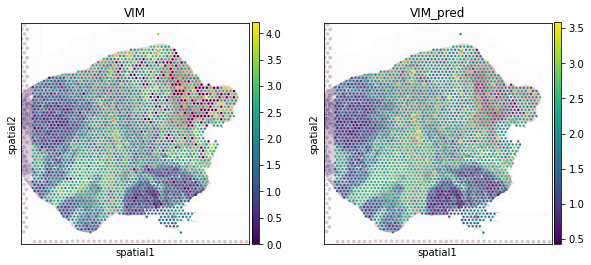

In [123]:
x_hat_df =pd.DataFrame(x_hat_all.cpu().detach().numpy())
x_hat_df.columns = dt.columns
x_hat_df
adA.obs['VIM_pred'] = x_hat_df['VIM'].values
sc.pl.spatial(adA,img_key="hires",color=['VIM','VIM_pred'])

In [124]:
## cor BN with GSVA
# cor based on all spots


#ttt = pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], gsva_scores1.loc[arch_spots,:]], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)/dt.shape[0]], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], exp_mat[exp_mat.columns.intersection(gs)].sum(axis=1)], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)/dt.shape[0]], axis=1)
    
#tt = ttt.corr()
#x_encoded,x_sample_cell,x_hat_all,x_samp_hat,z_all,z_samp,mu_all,std_all,mu_samp,std_samp
bn_all_np = mu_all.cpu().detach().numpy()
#bn_all_np = mu_all.cpu().detach().numpy()
#bn_all_np = z_all.cpu().detach().numpy()
bn_df = pd.DataFrame(bn_all_np)
bn_df.columns = ['bn'+str(i+1) for i in bn_df.columns]

bn_df.index = gsva_scores1.index

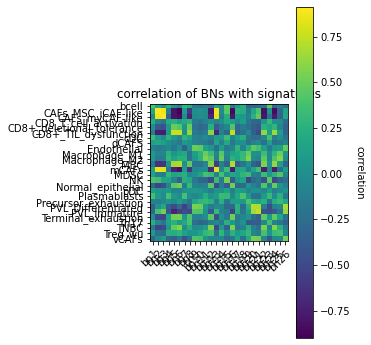

In [133]:
df1 = bn_df#.loc[arch_spots,:]
df2 = gsva_scores1#.loc[bn_df.index,:]
df=pd.concat([df1, df2], axis=1, keys=['df1', 'df2']).corr().loc['df2', 'df1']

fig, ax = plt.subplots()
#cor_bn_ct_df_marks_n = cor_bn_ct_df_marks.dropna(axis='columns')
#im = ax.imshow(df.divide(df.max(axis=1), axis=0),cmap="PuOr")#/df.max(axis=0),#/cor_bn_ct_df_marks_n.max(axis=0),
               
im = ax.imshow(df,cmap="viridis")

cbar = ax.figure.colorbar(im, ax=ax)#, **cbar_kw
cbar.ax.set_ylabel('correlation', rotation=-90, va="bottom")

# We want to show all ticks...
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.rcParams["figure.figsize"] = (18, 18)

ax.set_title("correlation of BNs with signatures")
fig.tight_layout()
plt.show()